In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
from collections import defaultdict,Counter
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv("movie_metadata.csv")

In [3]:
df.sample(5)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
635,Color,Seth MacFarlane,280.0,125.0,3000.0,3000.0,Morgan Freeman,14000.0,81257500.0,Comedy,...,229.0,English,USA,R,68000000.0,2015.0,11000.0,6.4,2.35,30000
1209,Color,Nancy Meyers,241.0,121.0,278.0,808.0,Anne Hathaway,22000.0,75274748.0,Comedy|Drama,...,304.0,English,USA,PG-13,35000000.0,2015.0,11000.0,7.2,1.85,54000
38,Color,Sam Raimi,525.0,130.0,0.0,11000.0,Mila Kunis,44000.0,234903076.0,Adventure|Family|Fantasy,...,511.0,English,USA,PG,215000000.0,2013.0,15000.0,6.4,2.35,60000
4637,Color,Sanjay Rawal,9.0,83.0,0.0,17.0,Robert Kennedy Jr.,56.0,NaN,Documentary|News,...,3.0,English,USA,NaN,913000.0,2014.0,28.0,7.1,NaN,489
2963,Color,Mark Neveldine,170.0,93.0,83.0,501.0,Edi Gathegi,26000.0,27829874.0,Action|Crime|Thriller,...,444.0,English,USA,R,12000000.0,2006.0,725.0,7.0,1.78,0


In [4]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [5]:
df.shape

(5043, 28)

In [6]:
df.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [7]:
df['gross'].fillna(df['gross'].median(),inplace=True)
df['budget'].fillna(df['budget'].median(),inplace=True)
df.dropna(inplace=True)

In [8]:
df.shape

(4411, 28)

## About the Data (EDA)

### Creating a new column to show main genre of movie. This will help in sorting out movies according to their genre types

In [9]:
df['main_genre'] = df['genres'].apply(lambda x: x.split('|')[0] if '|' in x else x) 

In [10]:
df.sample(2)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,main_genre
1430,Color,Judd Apatow,285.0,134.0,0.0,120.0,Maude Apatow,529.0,67523385.0,Comedy,...,English,USA,R,35000000.0,2012.0,130.0,6.2,2.35,18000,Comedy
4432,Color,Ira Sachs,39.0,108.0,60.0,121.0,Jenny O'Hara,826.0,25517500.0,Drama|Music|Romance,...,English,USA,R,1500000.0,2005.0,189.0,6.0,1.85,216,Drama


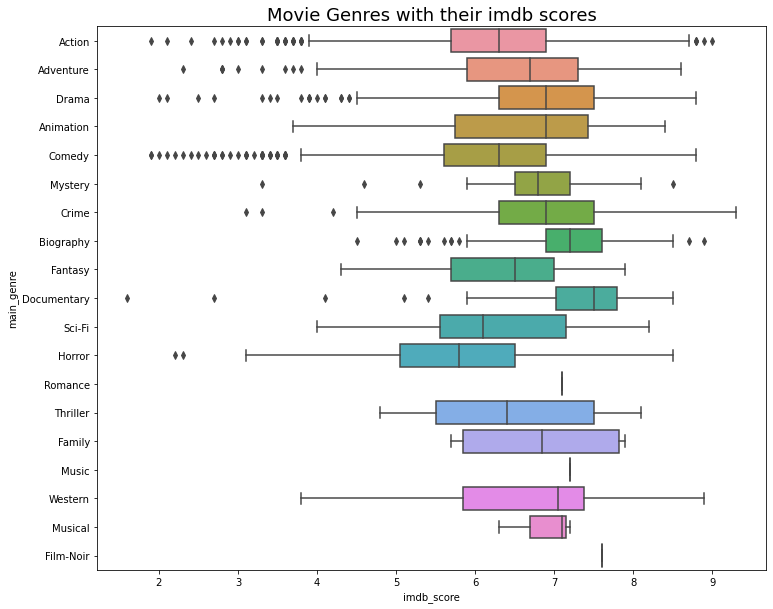

In [11]:
plt.figure(figsize=(12,10))
sns.boxplot(x='imdb_score',y='main_genre',data=df)
plt.title('Movie Genres with their imdb scores',fontsize=18)
plt.show()

In [12]:
numeric_cols = df.select_dtypes(include=np.number).columns
z_scores = np.abs((df[numeric_cols] - df[numeric_cols].mean()) / df[numeric_cols].std())
threshold = 3
df = df[(z_scores < threshold).all(axis=1)]

In [13]:
df.shape

(3632, 29)

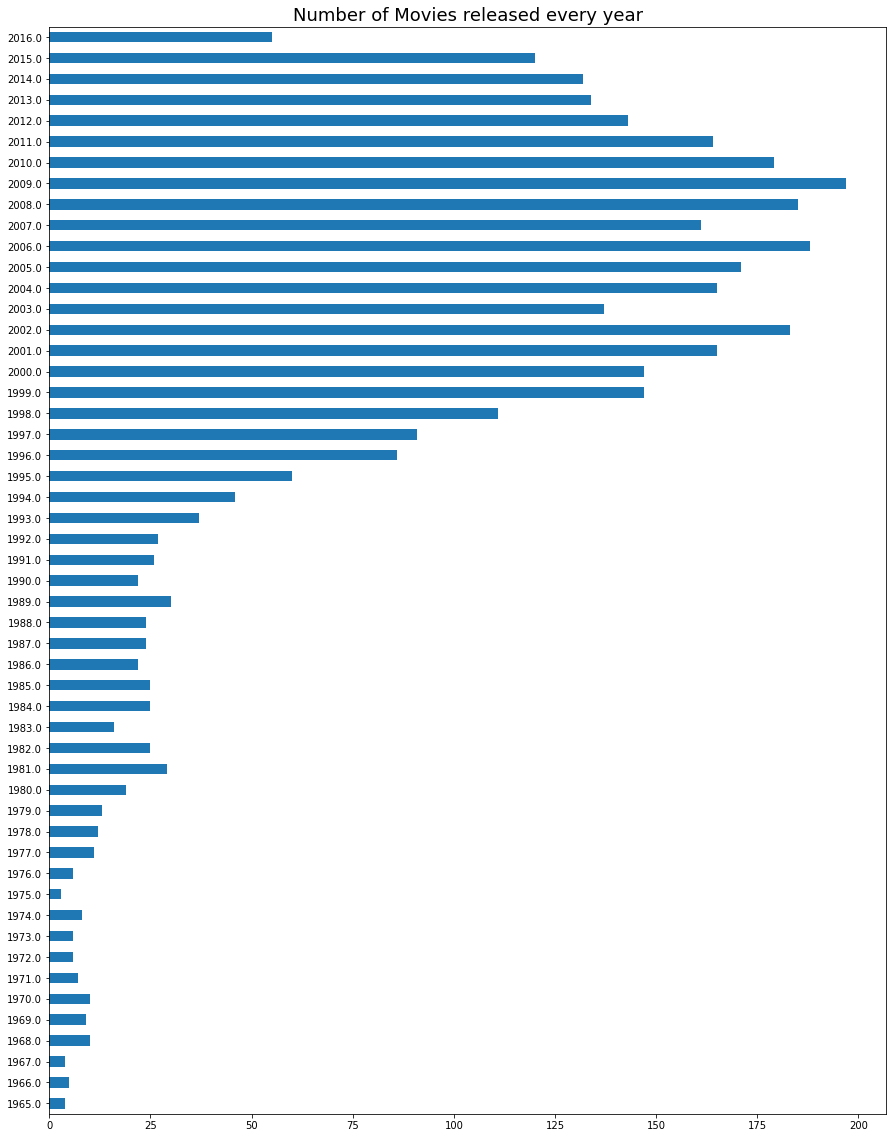

In [14]:
df.title_year.value_counts(dropna=True).sort_index().plot(kind='barh',figsize=(15,20))
plt.title("Number of Movies released every year",fontsize=18)
plt.show()

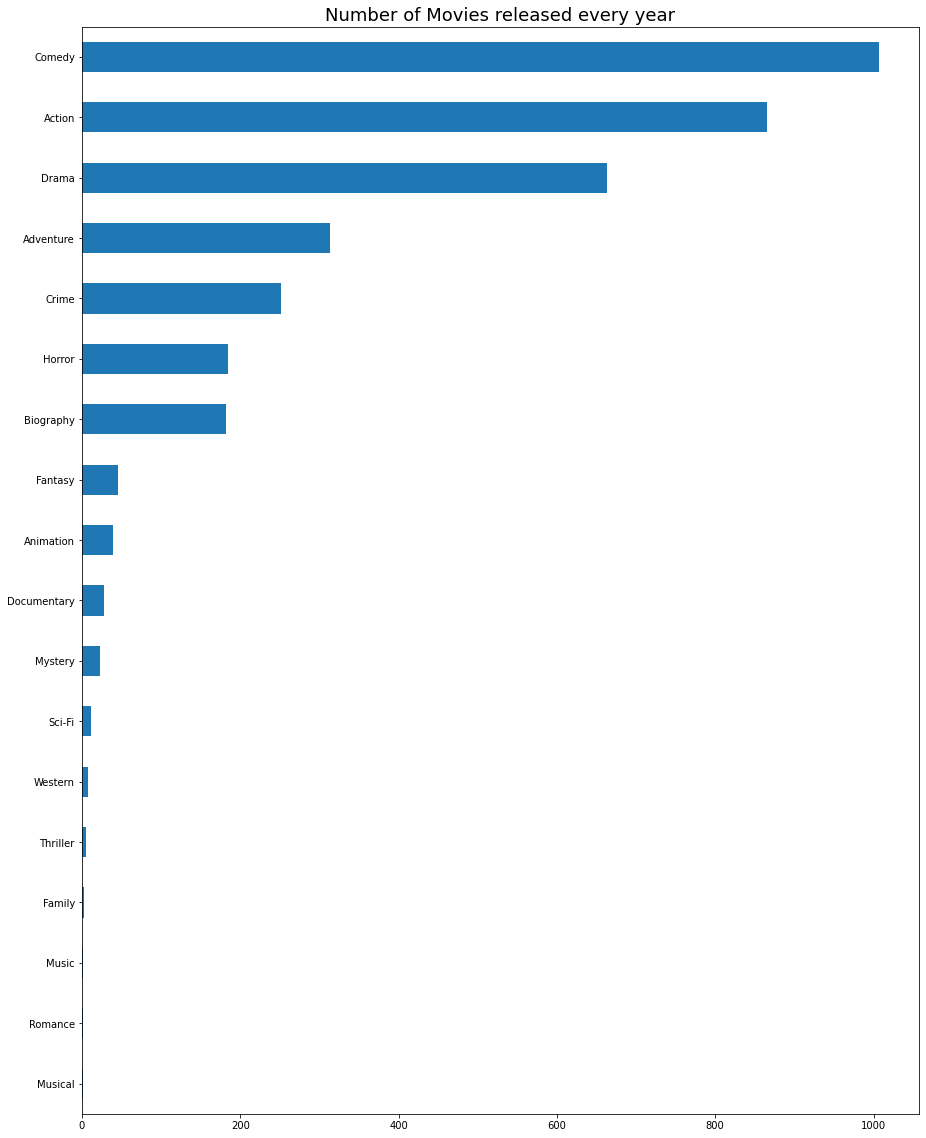

In [15]:
df.main_genre.value_counts(dropna=True).sort_values().plot(kind='barh',figsize=(15,20))
plt.title("Number of Movies released every year",fontsize=18)
plt.show()

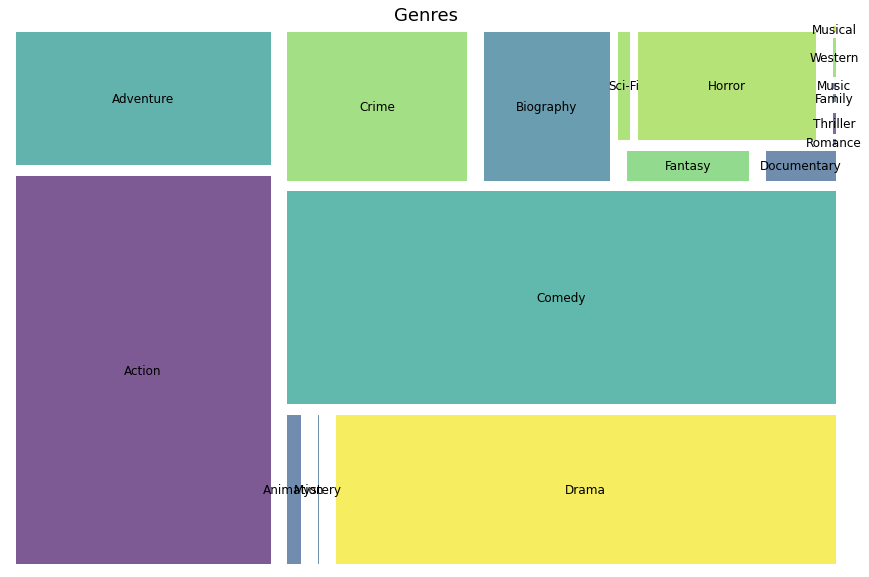

In [16]:
plt.figure(figsize=(15, 10))
squarify.plot(Counter(df['main_genre']).values(),label=Counter(df['main_genre']).keys(),text_kwargs={'fontsize':12}
             ,bar_kwargs={'alpha':.7},pad=True)
plt.title("Genres",fontsize=18)
plt.axis("off")
plt.show()

In [17]:
# Movies with the lowest Imdb rating 
df[df['imdb_score']==3.3]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,main_genre
313,Color,Pitof,212.0,87.0,26.0,566.0,Christopher Heyerdahl,827.0,40198710.0,Action|Crime|Fantasy|Romance|Thriller,...,English,USA,PG-13,100000000.0,2004.0,825.0,3.3,2.35,0,Action
1303,Color,William Malone,104.0,101.0,37.0,595.0,Jeffrey Combs,2000.0,13208023.0,Crime|Horror|Thriller,...,English,UK,R,42000000.0,2002.0,886.0,3.3,2.35,612,Crime
1934,Color,Bob Spiers,33.0,93.0,14.0,199.0,Richard Briers,1000.0,29247405.0,Comedy|Family|Music,...,English,UK,PG,25000000.0,1997.0,401.0,3.3,1.85,0,Comedy
2519,Color,Ian Iqbal Rashid,62.0,94.0,8.0,66.0,Clé Bennett,328.0,7070459.0,Drama,...,English,Canada,PG-13,20000000.0,2007.0,122.0,3.3,1.85,238,Drama
2550,Color,Perry Andelin Blake,56.0,80.0,11.0,499.0,Kenan Thompson,911.0,40363530.0,Comedy|Family,...,English,USA,PG,16000000.0,2002.0,521.0,3.3,1.85,1000,Comedy
2935,Color,Tamra Davis,111.0,93.0,33.0,135.0,Katherine Boecher,1000.0,37188667.0,Comedy|Drama,...,English,USA,PG-13,12000000.0,2002.0,188.0,3.3,1.85,0,Comedy
3197,Color,Tom Brady,49.0,97.0,105.0,269.0,Kevin Nealon,982.0,2331318.0,Comedy,...,English,USA,R,10000000.0,2011.0,503.0,3.3,1.85,0,Comedy
3230,Color,Alan Metter,17.0,83.0,3.0,421.0,Michael Winslow,16000.0,126247.0,Comedy|Crime,...,English,USA,PG,6200000.0,1994.0,542.0,3.3,1.85,321,Comedy
3799,Color,Klaus Menzel,13.0,103.0,34.0,227.0,Jacqueline Bisset,811.0,16066.0,Mystery|Romance|Thriller,...,English,Germany,R,5000000.0,2004.0,522.0,3.3,2.35,40,Mystery
4019,Color,Uwe Boll,17.0,86.0,892.0,50.0,Shelly Varod,603.0,25517500.0,Action|Adventure|Fantasy|Thriller,...,English,Canada,R,3500000.0,2014.0,145.0,3.3,1.78,721,Action


In [18]:
# Movie with the highest Imdb rating
df[df['imdb_score']==8.9]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,main_genre
4498,Color,Sergio Leone,181.0,142.0,0.0,24.0,Luigi Pistilli,16000.0,6100000.0,Western,...,Italian,Italy,Approved,1200000.0,1966.0,34.0,8.9,2.35,20000,Western


## Histogram of all columns in df

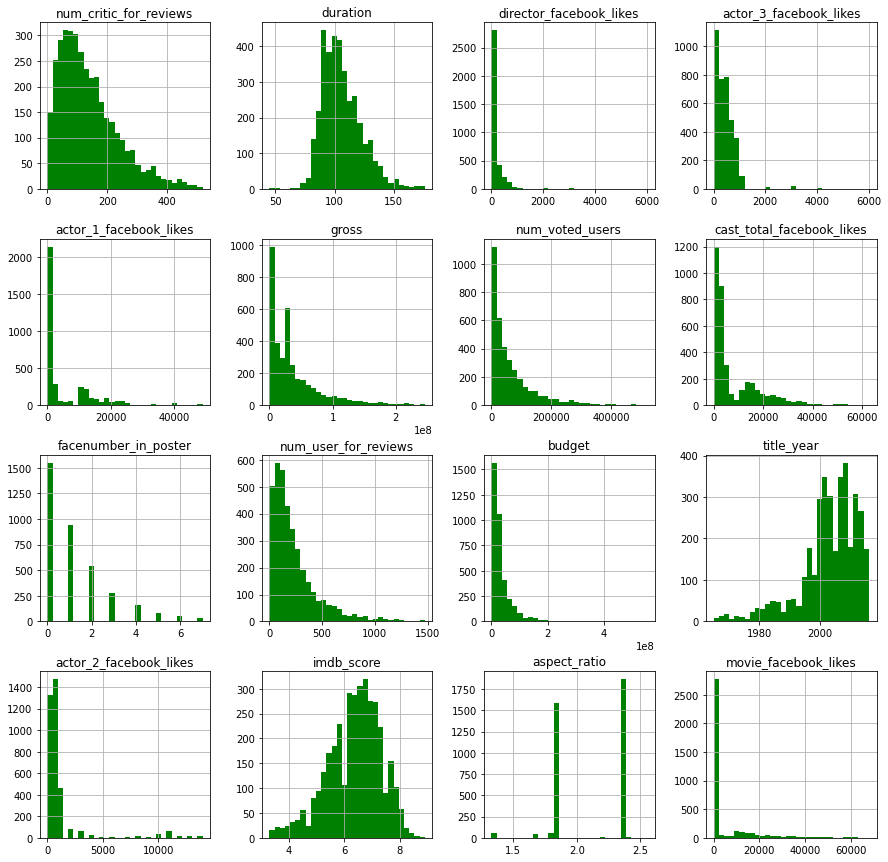

In [19]:
df.hist(bins=30,figsize=(15,15),color='g')
plt.show()

## Adding New Column that shows number of genres in movie

In [20]:
df['num_genres'] = df.genres.apply(lambda x: len(x.split('|')))

In [21]:
df.sample(2)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,main_genre,num_genres
3767,Color,Jon Favreau,81.0,95.0,4000.0,334.0,Faizon Love,4000.0,5308707.0,Comedy|Crime|Drama|Thriller,...,USA,R,5000000.0,2001.0,585.0,6.4,1.85,393,Comedy,4
674,Color,McG,241.0,103.0,368.0,520.0,Abigail Spencer,27000.0,54758461.0,Action|Comedy|Romance,...,USA,PG-13,65000000.0,2012.0,1000.0,6.3,2.35,18000,Action,3


In [22]:
df.num_genres.max()

8

In [23]:
df[df.num_genres==8]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,main_genre,num_genres
902,Color,Don Bluth,78.0,94.0,383.0,753.0,Kelsey Grammer,4000.0,58297830.0,Adventure|Animation|Drama|Family|Fantasy|Music...,...,USA,G,50000000.0,1997.0,808.0,7.1,2.35,0,Adventure,8
1387,Color,John Frankenheimer,126.0,124.0,287.0,475.0,James Frain,9000.0,23360779.0,Action|Adventure|Crime|Drama|Family|Fantasy|Ro...,...,USA,R,34000000.0,2000.0,1000.0,5.7,2.35,852,Action,8
2340,Color,Kevin Munroe,138.0,107.0,14.0,311.0,Laura Spencer,403.0,1183354.0,Action|Comedy|Crime|Fantasy|Horror|Mystery|Sci...,...,USA,PG-13,20000000.0,2010.0,368.0,5.1,2.35,0,Action,8


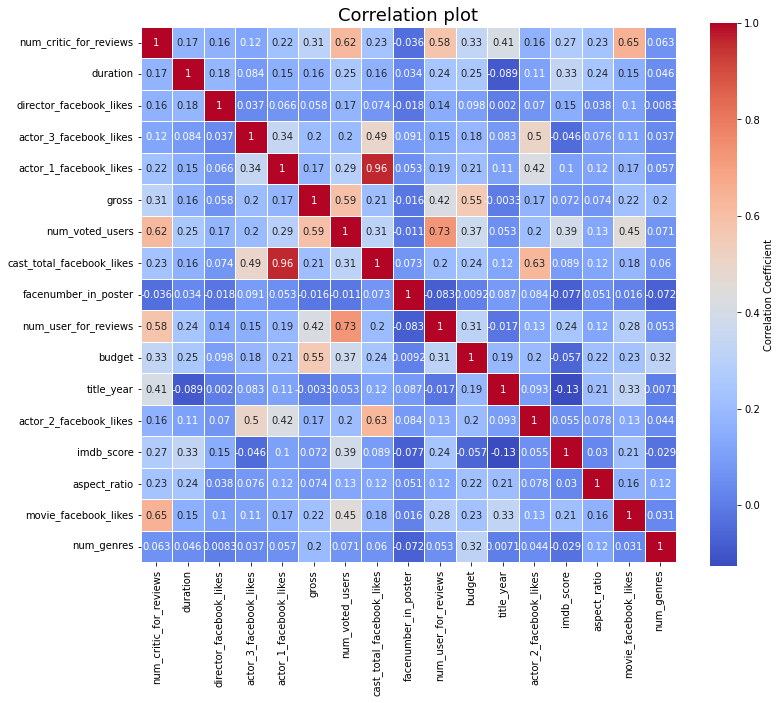

In [24]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,linewidths=.5,
            cmap='coolwarm',square=True,cbar_kws={'label': 'Correlation Coefficient'})
plt.title("Correlation plot",fontsize=18)
plt.show()

### Selected Cols for model
num_critic_for_reviews<br>
duration<br>
num_voted_users<br>
num_user_for_reviews<br>
movie_facbook_likes<br>
director_facebook_likes<br>

In [25]:
X = df[['num_critic_for_reviews','duration','num_voted_users','num_user_for_reviews','movie_facebook_likes'
       ,'director_facebook_likes']]
y = df['imdb_score']

In [26]:
X.shape,y.shape

((3632, 6), (3632,))

In [27]:
X_train, X_test, y_train, y_test = tts(X,y,test_size=0.2,random_state=32)

In [28]:
lm = LinearRegression()
lm.fit(X_train,y_train)
pred_lm= lm.predict(X_test)
print("Mean squared error using linear regression",mean_squared_error(y_test,pred_lm))
print("Mean absolute error using linear regression",mean_absolute_error(y_test,pred_lm))

Mean squared error using linear regression 0.6764002653437963
Mean absolute error using linear regression 0.6577251825742076


In [29]:
dtc = DecisionTreeRegressor()
dtc.fit(X_train, y_train)
pred_dt = dtc.predict(X_test)
print("Mean squared error using Decision Tree Regression",mean_squared_error(y_test,pred_dt))
print("Mean absolute error using Decision Tree regression",mean_absolute_error(y_test,pred_dt))

Mean squared error using Decision Tree Regression 1.154662998624484
Mean absolute error using Decision Tree regression 0.8220082530949104


In [30]:
svr = SVR(kernel='rbf')
svr.fit(X_train,y_train)
pred_svr = svr.predict(X_test)
print("Mean squared error using Support Vector regression",mean_squared_error(y_test,pred_svr))
print("Mean absolute error using Support Vector regression",mean_absolute_error(y_test,pred_svr))

Mean squared error using Support Vector regression 0.7296323816625633
Mean absolute error using Support Vector regression 0.6824112980469905


In [31]:
knn = KNeighborsRegressor(n_neighbors=12)
knn.fit(X_train,y_train)
pred_knn = knn.predict(X_test)
print("Mean squared error using KNN regression",mean_squared_error(y_test,pred_knn))
print("Mean absolute error using KNN regression",mean_absolute_error(y_test,pred_knn))

Mean squared error using KNN regression 0.7593067018187376
Mean absolute error using KNN regression 0.6909674461256305


### Conclusion:
#### Linear Regression model seems to perform best among all with MSE = 0.67 and MAE = 0.65

## To work with Classification models, Adding another column "movie_status" that contains wether movie is hit or (flop or average)

In [32]:
def getStatus(row):
    bgt = row['budget']
    grs = row['gross']
    
    if bgt*3<=grs:
        return 1
    return 0
    

In [33]:
df['movie_status'] = df[['budget','gross']].apply(getStatus, axis=1) #1 means HIT, 0 means FLOP

In [34]:
df['movie_status']

5       0
7       0
12      0
14      0
16      0
       ..
5026    1
5027    1
5033    1
5035    1
5042    1
Name: movie_status, Length: 3632, dtype: int64

In [35]:
y = df['movie_status']
X = df[['num_critic_for_reviews','duration','num_voted_users','num_user_for_reviews','movie_facebook_likes'
       ,'director_facebook_likes']]

In [36]:
X_train, X_test, y_train, y_test = tts(X,y,test_size=0.2,random_state=32)

In [37]:
svc = SVC(kernel='rbf')
svc.fit(X_train,y_train)
pred_svc = svc.predict(X_test)
print("Classification Report for Suppprt Vector Classifier:\n", classification_report(y_test, pred_svc))
accuracy = accuracy_score(y_test, pred_svc)
print("Accuracy score for Support Vector Classifier: ", accuracy)

Classification Report for Suppprt Vector Classifier:
               precision    recall  f1-score   support

           0       0.81      1.00      0.90       592
           1       0.00      0.00      0.00       135

    accuracy                           0.81       727
   macro avg       0.41      0.50      0.45       727
weighted avg       0.66      0.81      0.73       727

Accuracy score for Support Vector Classifier:  0.8143053645116919


/home/adeel/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/adeel/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/adeel/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)
pred_knn_cls = knn.predict(X_test)
print("Classification Report for KNN Classifier:\n", classification_report(y_test, pred_knn_cls))
accuracy = accuracy_score(y_test, pred_knn_cls)
print("Accuracy score for KNN Classifier: ", accuracy)

Classification Report for KNN Classifier:
               precision    recall  f1-score   support

           0       0.81      1.00      0.90       592
           1       0.00      0.00      0.00       135

    accuracy                           0.81       727
   macro avg       0.41      0.50      0.45       727
weighted avg       0.66      0.81      0.73       727

Accuracy score for KNN Classifier:  0.81292984869326


In [39]:
dt_cls = DecisionTreeClassifier()
dt_cls.fit(X_train, y_train)
pred_dt_cls = dt_cls.predict(X_test)
print("Classification Report for Decision Tree Classifier:\n", classification_report(y_test, pred_dt_cls))
accuracy = accuracy_score(y_test, pred_dt_cls)
print("Accuracy score for Decision Tree Classifier: ", accuracy)

Classification Report for Decision Tree Classifier:
               precision    recall  f1-score   support

           0       0.85      0.83      0.84       592
           1       0.31      0.34      0.33       135

    accuracy                           0.74       727
   macro avg       0.58      0.59      0.58       727
weighted avg       0.75      0.74      0.74       727

Accuracy score for Decision Tree Classifier:  0.7386519944979367


In [40]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
pred_rf_cls = rf_classifier.predict(X_test)
print("Classification Report for Random Forest Classifier:\n", classification_report(y_test, pred_rf_cls))
accuracy = accuracy_score(y_test, pred_rf_cls)
print("Accuracy score for Random Forest Classifier: ", accuracy)

Classification Report for Random Forest Classifier:
               precision    recall  f1-score   support

           0       0.84      0.98      0.91       592
           1       0.74      0.19      0.30       135

    accuracy                           0.84       727
   macro avg       0.79      0.58      0.60       727
weighted avg       0.82      0.84      0.79       727

Accuracy score for Random Forest Classifier:  0.8363136176066025


In [41]:
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train, y_train)
pred_lr_cls = lr_classifier.predict(X_test)
print("Classification Report for Logistic Regression Classifier:\n", classification_report(y_test, pred_lr_cls))
accuracy = accuracy_score(y_test, pred_lr_cls)
print("Accuracy score for Logistic Regression Classifier: ", accuracy)

Classification Report for Logistic Regression Classifier:
               precision    recall  f1-score   support

           0       0.82      0.99      0.90       592
           1       0.50      0.02      0.04       135

    accuracy                           0.81       727
   macro avg       0.66      0.51      0.47       727
weighted avg       0.76      0.81      0.74       727

Accuracy score for Logistic Regression Classifier:  0.8143053645116919


### Conclusion:
#### Random Forest Classifier seems to perform best among all, as it has 83% accuracy